## CMTH642 - Data Analytics: Advanced Methods  
### Assignment 2


Assignment 2 is worth 15% of the final grade. Submit the ipynb file and a generated output file (PDF or HTML). Failing to submit both files will be subject to a mark deduction.

Your output file should include all the tables, plots, and requested figures/values.

Printing the lengthy outputs (e.g., the whole data frame or a list with more than 100 elements) will have a deduction of 5 points. Instead, please use head() or tail() to have a neat output.

If you preprocess the data in a question, you should continue with the same dataset in the following questions unless otherwise mentioned.


### Preparation:

The dataset is related to Portuguese "Vinho Verde" wines. For more info:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Import the following files:
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv    
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv


In [1]:
import pandas as pd

dataWhite = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=";")
dataRed = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")

In [2]:
print("White Wine Quality Database")
dataWhite.head(n=2)

White Wine Quality Database


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [3]:
dataWhite.info()

#So I have the total counts and can check to make sure all rows were included later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
print("Red Wine Quality Database")
dataRed.head(n=2)

Red Wine Quality Database


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [5]:
dataRed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Question 1
Join the red wine and white wine datasets by adding the rows of one to the other. Assign the joined data to a data frame and name it wine_data_all. (2 points)

The following questions will be answered for wine_data_all.



In [6]:
#Because I prefer to not lose the detail when I combine the two datasets
dataWhite['Wine Type'] = "White"
dataRed['Wine Type'] = "Red"

In [7]:
wine_data_all = pd.concat([dataWhite, dataRed])
wine_data_all.head(n=2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,White


In [8]:
wine_data_all.info()
#to check and make sure all rows included

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Wine Type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


### Question 2
Check the data types of the attributes. (2 points)

In [9]:
wine_data_all.dtypes
#I could also use info(), but that feels like cheating having it above already

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Wine Type                object
dtype: object

### Question 3
Are there any missing values in the dataset? How many? You should not print the whole dataset. (2 points)

In [10]:
wine_data_all.info()
#There are 6,497 not null entries in each column, which means that there are no missing values
#I can also confirm this by going to the dataset info website, which says there are no missing values
#But that is another "feels like cheating" thing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Wine Type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


### Question 4
What is the correlation between the attributes other than Quality? (8 points)

In [11]:
wineCorrMatrix = wine_data_all.corr()
print(wineCorrMatrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

<ipython-input-11-51e5e3d6a071>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wineCorrMatrix = wine_data_all.corr()


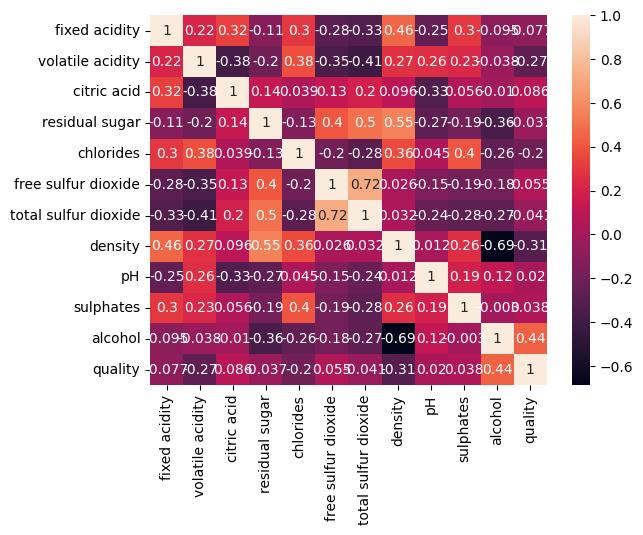

In [12]:
#I find correlations easier to interpret when represented visually, instead of as a mass of numbers
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(wineCorrMatrix, annot=True)
plt.show()

#from the heatmap (ignoring quality, as instructed in the question), most of the correlations are moderate to weak +/- relationships
#The strongest relationships (which are still in the moderate range) include a moderate positive relationship between
#total sulfur dioxide and free sulphur dioxide (completely logical) and a moderate negative relationship between alcohol
#and density (again, completely logical given alcohol's lower density, which is why alcohol content can be measured
#with a hydrometer [fun, unrelated fact])

### Question 5
Plot the frequency distribution of wine quality by using the Quality attribute. (8 points)

[Text(0.5, 1.0, 'Frequency Distribution of Quality of all Wines'),
 Text(0.5, 0, 'Wine Quality'),
 Text(0, 0.5, 'Frequency')]

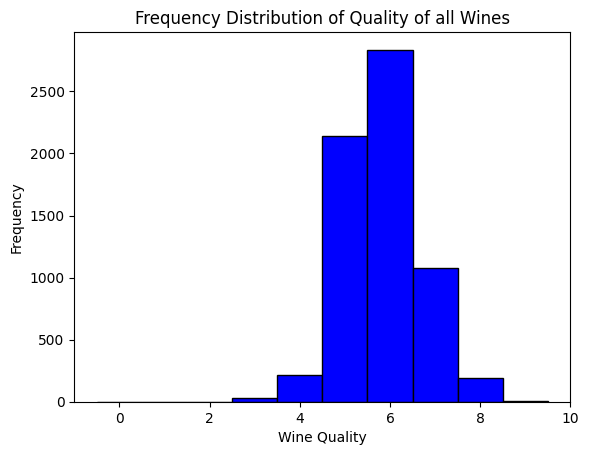

In [13]:
import numpy as np
bins = np.arange(11)-0.5 #to ensure the bars are centred on the x axis values, because it annoys me when they are skewed
plt.hist(wine_data_all['quality'], bins, color='blue', edgecolor='black', linewidth=1)
plt.gca().set(title='Frequency Distribution of Quality of all Wines', xlabel='Wine Quality', ylabel='Frequency')

### Question 6
Reduce the levels of rating for quality to three levels, i.e., high(2), medium(1), and low(0). Assign the levels 3 and 4 to level 0; 5 and 6 to level 1; and 7, 8, and 9 to level 2. You can use either “high, medium, low” or equivalent numbers. (10 points)

In [14]:
wineQual = {3:"low", 4:"low", 5:"medium", 6:"medium", 7:"high", 8:"high", 9:"high"}
wine_data_all["quality"] = wine_data_all["quality"].apply(lambda x:wineQual.get(x))
wine_data_all["quality"].info()

<class 'pandas.core.series.Series'>
Int64Index: 6497 entries, 0 to 1598
Series name: quality
Non-Null Count  Dtype 
--------------  ----- 
6497 non-null   object
dtypes: object(1)
memory usage: 101.5+ KB


In [15]:
wine_data_all.groupby(["quality"]).count()
#to check that quality has been reduced properly and all records still included

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Wine Type
quality,,,,,,,,,,,,
high,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277
low,246,246,246,246,246,246,246,246,246,246,246,246
medium,4974,4974,4974,4974,4974,4974,4974,4974,4974,4974,4974,4974


### Question 7
Normalize the numeric attributes. Hint: (x - min(x)) / (max(x) - min(x)) (10 points)

In [16]:
colNorm = wine_data_all.iloc[:,1:11] #to specify columns to be normalized
wine_data_all.iloc[:,1:11] = (colNorm - colNorm.min())/ (colNorm.max() - colNorm.min())

#I'm not sure why I had to specify 1:11 instead of 0:10, but 0:10 does not
#mnormalize the alcohol column so this is the code that works

#I could have also used the scikit-learn normalization function, but I figured
#this way would be best with the hint about the formula

In [17]:
wine_data_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type
0,7.0,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,medium,White
1,6.3,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,medium,White
2,8.1,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,medium,White
3,7.2,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,medium,White
4,7.2,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,medium,White


### Question 8
Divide the dataset to training and test sets. (10 points)

In [18]:
from sklearn.model_selection import train_test_split

indepVars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
X = wine_data_all[indepVars]
y = wine_data_all.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [19]:
#I used the following code to confirm everything split properly
 #(because I'm a bit obsessive), hashed out to save space for you to read
 #since it is not required

#X_train.info()
#y_train.info()
#X_test.info()
#y_test.info()

### Question 9
Use the Logistic Regression algorithm to predict the quality of wine using its attributes. (12 points)

In [21]:
from sklearn.linear_model import LogisticRegression
wineLogReg = LogisticRegression(random_state=27, max_iter=300)
#got warning message that max iterations was reached at 100 and 200 without converging, so increased to 300
wineLogReg.fit(X_train, y_train)
qualityPredictLog=wineLogReg.predict(X_test)

In [22]:
pd.DataFrame(qualityPredictLog).describe()
#just checking numbers again to make sure nothing funny is happening

,0
count,1950
unique,3
top,medium
freq,1801


### Question 10
Use the KNN algorithm to predict the quality of wine using its attributes. (12 points)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
wineKNN = KNeighborsClassifier(n_neighbors=67)
#working off the square root of the n for the number of neighbours
wineKNN.fit(X_train, y_train)
qualityPredictKNN = wineKNN.predict(X_test)

In [24]:
pd.DataFrame(qualityPredictKNN).describe()

,0
count,1950
unique,2
top,medium
freq,1826


### Question 11
Display two confusion matrices to evaluate the performances of Logistic Regression and KNN. (A simple matrix is enough. No need to plot it.) (12 points)

In [31]:
from sklearn.metrics import confusion_matrix
logConfusionMatrix = sklearn.metrics.confusion_matrix(y_test, qualityPredictLog, labels=["low", "medium", "high"])
print("Logistic Regression Confusion Matrix (low, medium, high)")
print(logConfusionMatrix)

Logistic Regression Confusion Matrix (low, medium, high)
[[   1   70    1]
 [   0 1456   53]
 [   0  275   94]]


In [32]:
knnConfusionMatrix = sklearn.metrics.confusion_matrix(y_test, qualityPredictKNN, labels=["low", "medium", "high"])
print("K Nearest Neighbours Confusion Matrix(low, medium, high)")
print(knnConfusionMatrix)

K Nearest Neighbours Confusion Matrix(low, medium, high)
[[   0   69    3]
 [   0 1463   46]
 [   0  294   75]]


### Question 12
Evaluate the models’ performances by computing Accuracy, Precision, and Recall. If you are using a package to calculate the values, you should explain what you understand from the output of the package by mentioning the exact accuracy, precision, and recall values in your own words. (12 points)


In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [28]:
print("Accuracy is the total number of correct predictions, divided by the total number of observations,")
print("which can also be represented as TP + TN / TP + TN + FP + FN.")
print("This gives an overall metric of the models performance")
print("---")

logAccuracy = accuracy_score(y_test, qualityPredictLog)
print("Logistic Regression Accuracy:", round((logAccuracy*100), 2),"%")

knnAccuracy = accuracy_score(y_test, qualityPredictKNN)
print("K Nearest Neighbours Accuracy:", round((knnAccuracy*100), 2),"%")
print('--------------------------------------------')

print("The issue with accuracy is that it does not account for if one of the outcomes")
print("is better or worse than the other.")
print("Precision is the correct positive predictions, divided by the total positive predictions,")
print("(correct and incorrect), or TP / TP + FP. If our precision is high, that means that if something")
print("was predicted as positive, it is likely to actually be positive. Maximizing precision is")
print("important in situations where a false positive would be considered worse than a false negative")
print("---")
logPrecision = precision_score(y_test, qualityPredictLog, average="weighted")
print("Logistic Regression Precision:", round((logPrecision*100), 2),"%")

knnPrecision = precision_score(y_test, qualityPredictKNN, average="weighted", zero_division=0.0)
print("K Nearest Neighbours Precision:", round((knnPrecision*100), 2),"%")
print('--------------------------------------------')

print("Finally, recall is the correct positive predictions, divided by all actual positive observations,")
print("which is TP / TP + FN. So if the positive outcome is considered worse, then we would want this number")
print("to be maximized so we are catching as many of the 'bad' positive events that we can. In other words,")
print("a false negative is considered worse than a false positive")
print("---")
logRecall = recall_score(y_test, qualityPredictLog, average="weighted")
print("Logistic Regression Recall:", round((logRecall*100), 2),"%")
knnRecall = recall_score(y_test, qualityPredictKNN, average="weighted")
print("K Nearest Neighbours Recall:", round((knnRecall*100), 2),"%")
print('--------------------------------------------')


Accuracy is the total number of correct predictions, divided by the total number of observations,
which can also be represented as TP + TN / TP + TN + FP + FN.
This gives an overall metric of the models performance
---
Logistic Regression Accuracy: 79.54 %
K Nearest Neighbours Accuracy: 78.87 %
--------------------------------------------
The issue with accuracy is that it does not account for if one of the outcomes
is better or worse than the other.
Precision is the correct positive predictions, divided by the total positive predictions,
(correct and incorrect), or TP / TP + FP. If our precision is high, that means that if something
was predicted as positive, it is likely to actually be positive. Maximizing precision is
important in situations where a false positive would be considered worse than a false negative
---
Logistic Regression Precision: 78.27 %
K Nearest Neighbours Precision: 73.45 %
--------------------------------------------
Finally, recall is the correct positive predic

In [ ]:
#This shows that the Logistic Regression gets 79.54% of all predictions correct,
#that 78.27% of the positive predictions are actually positive (true positives), and
#that 79.54% of the actual positives were identified

#Then for the K Nearest Neighbour, 78.87% of all predictions were correct,
#73.45% of the positive predictions were true positives, and 78.87% of the
#actual positives were identified

This is the end of Assignment 2

Ceni Babaoglu, PhD